In [1]:
import control.matlab as control
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y0 = 0.15
wn = np.sqrt(2)
zeta = 1/(2 * np.sqrt(2))
t = np.arange(0, 10, 0.1)

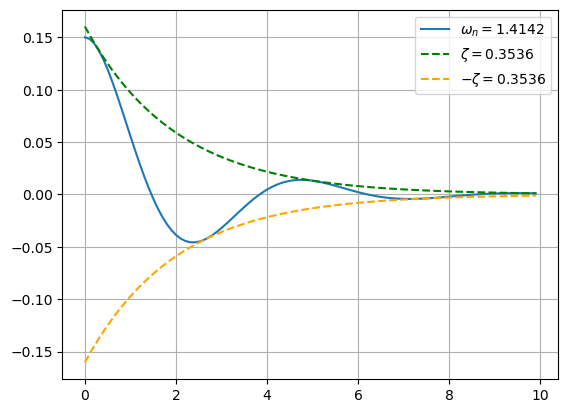

In [23]:
c = (y0 / np.sqrt(1 - np.square(zeta)))
y = c * np.exp(-zeta * wn * t) * np.sin(wn * np.sqrt(1 - np.square(zeta)) * t + np.arccos(zeta))

bu = c * np.exp(-zeta * wn * t)
bl = -bu

plt.plot(t, y, label=f"$\\omega_n={wn:0.4f}$")
plt.plot(t, bu,'--', color="green", label=f"$\\zeta={zeta:0.4f}$" )
plt.plot(t, bl, '--', color="orange",label=f"$-\\zeta={zeta:0.4f}$"  )
plt.legend()
plt.grid()

In [24]:
p = np.array([3, 2, 1])
q = np.array([1, 4])
n = np.convolve(p, q)
print(n)

[ 3 14  9  4]


In [25]:
value = np.polyval(n, -5)
value

np.int64(-66)

In [29]:
num1 = [10]
den1 = [1, 2, 5]
sys1 = control.tf(num1, den1)

num2 = [1]
den2 = [1, 1]
sys2 = control.tf(num2, den2)

sys = sys1 + sys2

sys

TransferFunction(array([ 1, 12, 15]), array([1, 3, 7, 5]))

In [ ]:
sys = control.tf([1,10], [1, 2, 1])

p = control.pole(sys)


z = control.zeros(sys)



array([-10.+0.j])

In [ ]:
numg = [6, 0, 1]
deng = [1, 3, 3, 1]

sysg = control.tf(numg, deng)

pg = control.pole(sysg)
zg = control.zero(sysg)


array([-0.99999588+7.12759326e-06j, -0.99999588-7.12759326e-06j,
       -1.00000823+0.00000000e+00j])

c:\Users\JanRay\miniconda3\envs\pyeng\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
c:\Users\JanRay\miniconda3\envs\pyeng\Lib\site-packages\control\pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


(array([-2.        +0.j        , -1.00012993+0.j        ,
        -0.99999999+0.00012992j, -0.99999999-0.00012992j,
        -0.99987009+0.j        ]),
 array([-3.00000000e+00+0.j        , -1.03424756e-15+2.j        ,
        -2.21441610e-16-2.j        , -2.51348014e-16+0.40824829j,
        -1.31371256e-16-0.40824829j]))

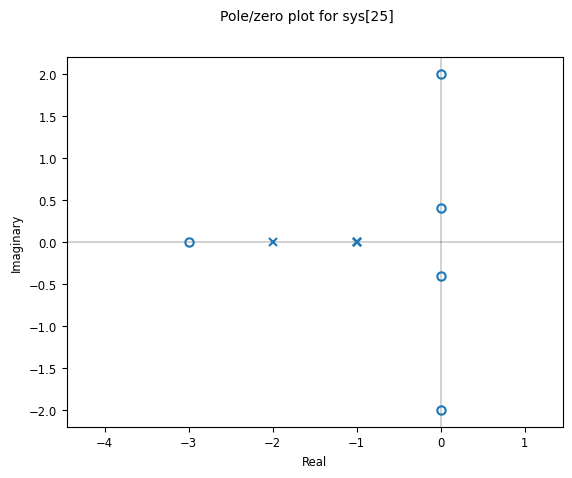

In [45]:
hn1 = [1, 1]
hn2 = [1, 2]

hd1 = [1, 2j]
hd2 = [1, -2j]
hd3 = [1, 3]

numh = np.convolve(hn1, hn2)
denh = np.convolve(hd1, np.convolve(hd2, hd3))

sysh = control.tf(numh, denh)

sys = sysg/sysh

control.pzmap(sys, plot=True)


In [46]:
numg = [1]
deng = [500, 0, 0]
sysg = control.tf(numg, deng)

numh = [1, 1]
denh = [1, 2]
sysh = control.tf(numh, denh)

sys = control.series(sysg, sysh)
sys

TransferFunction(array([1, 1]), array([ 500, 1000,    0,    0]))

In [47]:
numg = [1]
deng = [500, 0, 0]
sys1 = control.tf(numg, deng)

numh = [1, 1]
denh = [1, 2]
sys2 = control.tf(numh, denh)

sys3 = control.series(sysg, sysh)
sys = control.feedback(sys3, sign=-1)
sys

TransferFunction(array([1, 1]), array([ 500, 1000,    1,    1]))

# Exercises
1. Consider the two polynomials
$$ p(s) = s^2 +7s + 10 $$

and 

$$ q(s) = s + 2 $$

Compute the following \
(a)&emsp;$p(s)\,q(s)$ \
(b)&emsp;poles and zeros of $G(s) = \frac{q(s)}{p(s)}$ \
(c)&emsp;$p(-1)$

In [64]:
p = [1, 7, 10]
q = [1, 2]
pq = np.convolve(p,q)
print(f"(a).\n p(s)q(s) is: {pq}")

p_roots = np.roots(p)
q_roots = np.roots(q)

print(f"(b).\nRoots of p(s) = {p_roots}")
print(f"Roots of q(s) = {q_roots}")

value = np.polyval(p, -1)
print(f"(c). \n The value at p(-1): {value}")


(a).
 p(s)q(s) is: [ 1  9 24 20]
(b).
Roots of p(s) = [-5. -2.]
Roots of q(s) = [-2.]
(c). 
 The value at p(-1): 4


2. Consider the differential equation
$$ \ddot{y}+ 4\dot{y}+ 3y = u $$
where $y(0) = \dot{y}(0) = 0 $ and $u(t)$ is a unit step.
Determine
the solution $y(t)$ analytically, and verify
by co-plotting the analytic solution and the step response
obtained with the step function.

##### Analytical solution
Given $$ \ddot{y} + 4\dot{y} + 3y = u $$ 
with $y(0)=\dot{y} = 0 $ and $U(s) = 1/s$, we obtain (via Laplace Transform)

$$ Y(s) = \frac{1}{s(s^2 + 4s + 3)} = \frac{1}{s(s+3)(s+1)}. $$

Expanding in a partial fraction expansion yields
$$ Y(s) = \frac{1}{3s}-\frac{1}{6(s+3)}-\frac{1}{2(s+1)}. $$

Taking the inverse Laplace transform, we obtain the solution

$$ y(t) = 0.3333 + 0.1667e^{-3t} - 0.5e^{-t} 
$$.
The code is shown as follows:

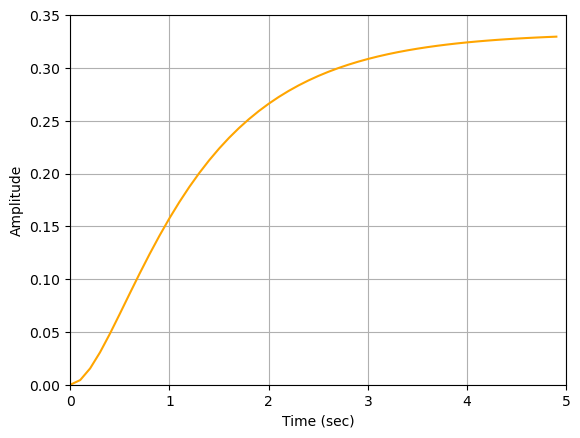

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import control.matlab as control

n = [1]
d = [1, 4, 3]
sys = control.tf(n, d)
t = np.arange(0, 5, 0.1)
y, tout = control.step(sys, t)
ya = 0.3333 + (0.1667 * np.exp(-3 * t))-(0.5*np.exp(-t))
plt.plot(tout, y, color="orange")
#plt.plot(t, ya, color="green")
plt.ylim(0, 0.35)
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.xlim(0, 5)
plt.grid()
plt.show()

3. The mass-spring-damper system is represented by
$$ m\ddot{x} + b\dot{x} + kx = f 
$$.
Taking the Laplace transform (with zero initial conditions) yields the transfer function
$$
X(s)/F(s) = \frac{1/m}{s^2 + bs/m + k/m}
$$
The code and step response is shown in the following:


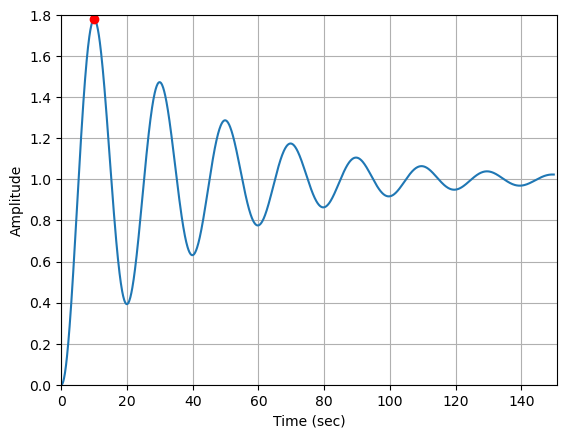

(array([100]),)
1.7794217181443504


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import control.matlab as control

m = 10
k = 1
b = 0.5
num = [1/m]
den = [1, b/m, k/m]

sys = control.tf(num, den)
t = np.arange(0, 150, 0.1)
y, tout = control.step(sys, t)

max_y = np.max(y)
max_y_index = np.where(y == max_y)

plt.plot(tout, y)
plt.plot(tout[max_y_index],max_y, 'ro')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.xlim(0, 151)
plt.ylim(0, 1.80)
plt.show()


print(max_y_index)
print(max_y)
